In [2]:
import sys
import os
import numpy as np 
import h5py
import scipy
import matplotlib.pyplot as plt
import ipywidgets as widgets

sys.path.append('../../src')
from utils.evaluate_utils import get_indices, get_spatial_indices, plot_qual_comparsion, random_indices3D, calculate_k_R2_timeseries
from utils.colors import *

In [12]:
lr_dir = '../../data/paired_invivo'
hr_dir = '../../data/paired_invivo'
sr_dir = '../../results/in_vivo/paired_data/v3_wholeheart_25mm_40ms'

lr_filename = 'v3_wholeheart_25mm_40ms.h5'
hr_filename = 'v3_wholeheart_25mm_20ms.h5'
sr_filename = 'v3_wholeheart_25mm_40ms_20240709-2057.h5'
sr_filename_rec = 'v3_wholeheart_25mm_20ms_20240709-2057_reconstructedhr_16ps.h5'

eval_dir = f'../../results/in_vivo/paired_data/plots/eval_{sr_filename[:-3]}'
eval_dir_paper_plots = f'../../results/in_vivo/paired_data/plots/eval_{sr_filename[:-3]}/paper_drafts'
os.makedirs(eval_dir, exist_ok=True)
os.makedirs(eval_dir_paper_plots, exist_ok=True)

with h5py.File(f'{lr_dir}/{lr_filename}', 'r') as f:
    lr_u = np.array(f['u'])
    lr_v = np.array(f['v'])
    lr_w = np.array(f['w'])
    mask = np.array(f['mask'])
    mask_aorta = np.array(f['mask_aorta'])
    mask_lv = np.array(f['mask_LV'])

with h5py.File(f'{hr_dir}/{hr_filename}', 'r') as f:
    hr_u = np.array(f['u'])
    hr_v = np.array(f['v'])
    hr_w = np.array(f['w'])

with h5py.File(f'{sr_dir}/{sr_filename}', 'r') as f:
    sr_u = np.array(f['u_combined'])
    sr_v = np.array(f['v_combined'])
    sr_w = np.array(f['w_combined'])

with h5py.File(f'{sr_dir.replace("40ms", "20ms")}/{sr_filename_rec}', 'r') as f:
    sr_u_rec = np.array(f['u_combined'])
    sr_v_rec = np.array(f['v_combined'])
    sr_w_rec = np.array(f['w_combined'])

T_lr = lr_u.shape[0]
T_hr = hr_u.shape[0]

_, X, Y, Z = lr_u.shape

assert lr_u.shape[1:] == hr_u.shape[1:] == sr_u.shape[1:]

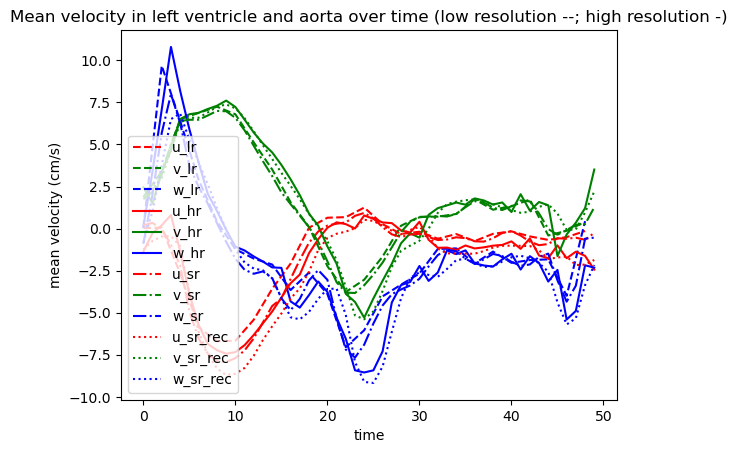

In [26]:
# plt mean velocity whole fluid region

u_lr_mean = np.mean(lr_u,axis=(1,2,3), where=mask.astype(bool))
v_lr_mean = np.mean(lr_v,axis=(1,2,3), where=mask.astype(bool))
w_lr_mean = np.mean(lr_w,axis=(1,2,3), where=mask.astype(bool))

u_hr_mean = np.mean(hr_u, axis=(1,2,3), where=mask.astype(bool))
v_hr_mean = np.mean(hr_v, axis=(1,2,3), where=mask.astype(bool))
w_hr_mean = np.mean(hr_w, axis=(1,2,3), where=mask.astype(bool))

u_sr_mean = np.mean(sr_u, axis=(1,2,3), where=mask.astype(bool))
v_sr_mean = np.mean(sr_v, axis=(1,2,3), where=mask.astype(bool))
w_sr_mean = np.mean(sr_w, axis=(1,2,3), where=mask.astype(bool))

u_sr_mean_rec = np.mean(sr_u_rec, axis=(1,2,3), where=mask.astype(bool))
v_sr_mean_rec = np.mean(sr_v_rec, axis=(1,2,3), where=mask.astype(bool))
w_sr_mean_rec = np.mean(sr_w_rec, axis=(1,2,3), where=mask.astype(bool))

plt.figure()
plt.plot(range(0, len(hr_u), 2), u_lr_mean, '--',  label='u_lr',  color = 'r')
plt.plot(range(0, len(hr_u), 2), v_lr_mean, '--',  label='v_lr',  color = 'g')
plt.plot(range(0, len(hr_u), 2), w_lr_mean, '--',  label='w_lr',  color = 'b')
plt.plot(u_hr_mean, label='u_hr',  color = 'r')
plt.plot(v_hr_mean, label='v_hr',  color = 'g')
plt.plot(w_hr_mean, label='w_hr',  color = 'b')
plt.plot(u_sr_mean, label='u_sr',  color = 'r', linestyle='-.')
plt.plot(v_sr_mean, label='v_sr',  color = 'g', linestyle='-.')
plt.plot(w_sr_mean, label='w_sr',  color = 'b', linestyle='-.')
plt.plot(u_sr_mean_rec, label='u_sr_rec',  color = 'r', linestyle=':')
plt.plot(v_sr_mean_rec, label='v_sr_rec',  color = 'g', linestyle=':')
plt.plot(w_sr_mean_rec, label='w_sr_rec',  color = 'b', linestyle=':')
plt.legend()
plt.xlabel('time')
plt.ylabel('mean velocity (cm/s)')
plt.title('Mean velocity in left ventricle and aorta over time (low resolution --; high resolution -)')
plt.show()

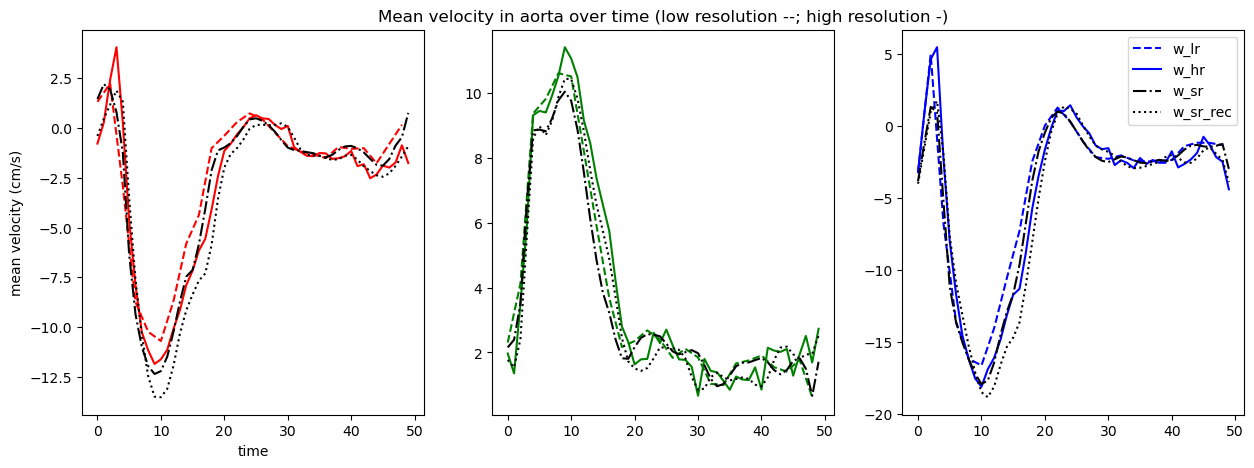

u: [(0, -0.78), (1, 0.28), (2, 2.42), (3, 4.06), (4, 0.26), (5, -4.65), (6, -7.89), (7, -10.26), (8, -11.17), (9, -11.86), (10, -11.63), (11, -11.15), (12, -10.08), (13, -9.16), (14, -7.9), (15, -7.17), (16, -6.15), (17, -5.57), (18, -4.08), (19, -2.42), (20, -1.15), (21, -0.79), (22, -0.32), (23, 0.04), (24, 0.49), (25, 0.65), (26, 0.49), (27, 0.46), (28, 0.16), (29, -0.05), (30, 0.11), (31, -0.95), (32, -1.2), (33, -1.39), (34, -1.41), (35, -1.26), (36, -1.27), (37, -1.55), (38, -1.52), (39, -1.42), (40, -1.15), (41, -1.91), (42, -1.82), (43, -2.52), (44, -2.33), (45, -1.88), (46, -1.99), (47, -1.73), (48, -0.87), (49, -1.76)]
v: [(0, 1.97), (1, 1.35), (2, 3.5), (3, 5.9), (4, 9.32), (5, 9.46), (6, 9.41), (7, 9.93), (8, 10.54), (9, 11.42), (10, 11.08), (11, 10.5), (12, 9.16), (13, 8.47), (14, 7.38), (15, 6.56), (16, 5.76), (17, 4.21), (18, 2.8), (19, 2.32), (20, 1.63), (21, 1.79), (22, 1.8), (23, 2.61), (24, 2.29), (25, 2.71), (26, 2.22), (27, 1.79), (28, 1.77), (29, 1.56), (30, 0.66)

In [27]:
# plot mean velocity over time in each direction - aorta

u_lr_mean_aorta = np.mean(lr_u,axis=(1,2,3), where=mask_aorta.astype(bool))
v_lr_mean_aorta = np.mean(lr_v,axis=(1,2,3), where=mask_aorta.astype(bool))
w_lr_mean_aorta = np.mean(lr_w,axis=(1,2,3), where=mask_aorta.astype(bool))

u_hr_mean_aorta = np.mean(hr_u, axis=(1,2,3), where=mask_aorta.astype(bool))
v_hr_mean_aorta = np.mean(hr_v, axis=(1,2,3), where=mask_aorta.astype(bool))
w_hr_mean_aorta = np.mean(hr_w, axis=(1,2,3), where=mask_aorta.astype(bool))

u_sr_mean_aorta = np.mean(sr_u, axis=(1,2,3), where=mask_aorta.astype(bool))
v_sr_mean_aorta = np.mean(sr_v, axis=(1,2,3), where=mask_aorta.astype(bool))
w_sr_mean_aorta = np.mean(sr_w, axis=(1,2,3), where=mask_aorta.astype(bool))

u_sr_mean_aorta_rec = np.mean(sr_u_rec, axis=(1,2,3), where=mask_aorta.astype(bool))
v_sr_mean_aorta_rec = np.mean(sr_v_rec, axis=(1,2,3), where=mask_aorta.astype(bool))
w_sr_mean_aorta_rec = np.mean(sr_w_rec, axis=(1,2,3), where=mask_aorta.astype(bool))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(0, len(hr_u), 2), u_lr_mean_aorta, '--', color = 'r')
plt.plot(u_hr_mean_aorta, label='u_hr',  color = 'r')
plt.plot(u_sr_mean_aorta, label='u_sr',  color = 'black', linestyle='-.')
plt.plot(u_sr_mean_aorta_rec, label='u_sr_rec',  color = 'black', linestyle=':')
plt.xlabel('time')
plt.ylabel('mean velocity (cm/s)')

plt.subplot(1, 3, 2)
plt.plot(range(0, len(hr_u), 2), v_lr_mean_aorta, '--', color = 'g')
plt.plot(v_hr_mean_aorta, label='v_hr',  color = 'g')
plt.plot(v_sr_mean_aorta, label='v_sr',  color = 'black', linestyle='-.')
plt.plot(v_sr_mean_aorta_rec, label='v_sr_rec',  color = 'black', linestyle=':')
plt.title('Mean velocity in aorta over time (low resolution --; high resolution -)')

plt.subplot(1, 3, 3)
plt.plot(range(0, len(hr_u), 2), w_lr_mean_aorta, '--', label = 'w_lr', color = 'b')
plt.plot(w_hr_mean_aorta, label='w_hr',  color = 'b')
plt.plot(w_sr_mean_aorta, label='w_sr',  color = 'black', linestyle='-.')
plt.plot(w_sr_mean_aorta_rec, label='w_sr_rec',  color = 'black', linestyle=':')
plt.legend()
plt.show()

vel_u_aorta_time = [(frame, u_hr_mean_aorta[frame].round(2)) for frame in range(T_hr)]
vel_v_aorta_time = [(frame, v_hr_mean_aorta[frame].round(2)) for frame in range(T_hr)]
vel_w_aorta_time = [(frame, w_hr_mean_aorta[frame].round(2)) for frame in range(T_hr)]
print('u:', vel_u_aorta_time)
print('v:', vel_v_aorta_time)
print('w:', vel_w_aorta_time)

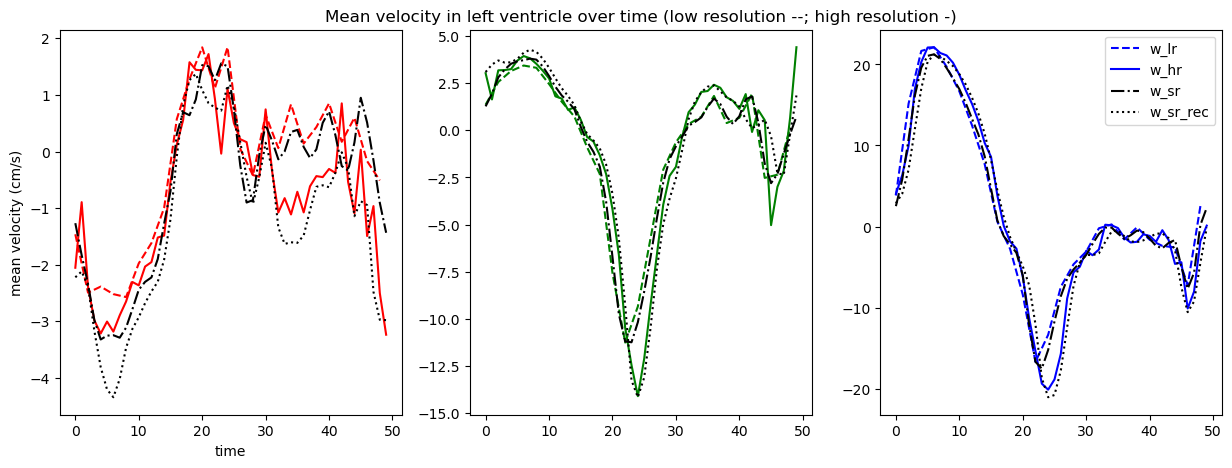

u: [(0, -2.05), (1, -0.89), (2, -2.39), (3, -2.98), (4, -3.22), (5, -3.0), (6, -3.18), (7, -2.89), (8, -2.65), (9, -2.31), (10, -2.36), (11, -2.03), (12, -1.95), (13, -1.52), (14, -1.48), (15, -0.53), (16, 0.12), (17, 0.56), (18, 1.58), (19, 1.44), (20, 1.44), (21, 1.72), (22, 0.93), (23, -0.04), (24, 1.11), (25, 0.5), (26, 0.22), (27, 0.17), (28, -0.42), (29, -0.45), (30, 0.75), (31, -0.33), (32, -1.08), (33, -0.82), (34, -1.11), (35, -0.71), (36, -1.08), (37, -0.61), (38, -0.43), (39, -0.45), (40, -0.31), (41, -0.38), (42, 0.85), (43, -0.53), (44, -1.09), (45, 0.03), (46, -1.49), (47, -0.96), (48, -2.5), (49, -3.24)]
v: [(0, 3.03), (1, 1.64), (2, 3.19), (3, 3.2), (4, 3.25), (5, 3.7), (6, 3.94), (7, 3.82), (8, 3.53), (9, 3.17), (10, 2.76), (11, 1.8), (12, 1.68), (13, 1.09), (14, 1.22), (15, 0.56), (16, -0.35), (17, -0.6), (18, -1.32), (19, -2.32), (20, -4.19), (21, -6.59), (22, -10.48), (23, -12.46), (24, -14.11), (25, -12.12), (26, -9.28), (27, -6.6), (28, -3.95), (29, -2.42), (30, -

In [28]:
# plot mean velocity for left ventricle

u_lr_mean_lv = np.mean(lr_u,axis=(1,2,3), where=mask_lv.astype(bool))
v_lr_mean_lv = np.mean(lr_v,axis=(1,2,3), where=mask_lv.astype(bool))
w_lr_mean_lv = np.mean(lr_w,axis=(1,2,3), where=mask_lv.astype(bool))

u_hr_mean_lv = np.mean(hr_u, axis=(1,2,3), where=mask_lv.astype(bool))
v_hr_mean_lv = np.mean(hr_v, axis=(1,2,3), where=mask_lv.astype(bool))
w_hr_mean_lv = np.mean(hr_w, axis=(1,2,3), where=mask_lv.astype(bool))

u_sr_mean_lv = np.mean(sr_u, axis=(1,2,3), where=mask_lv.astype(bool))
v_sr_mean_lv = np.mean(sr_v, axis=(1,2,3), where=mask_lv.astype(bool))
w_sr_mean_lv = np.mean(sr_w, axis=(1,2,3), where=mask_lv.astype(bool))

u_sr_mean_lv_rec = np.mean(sr_u_rec, axis=(1,2,3), where=mask_lv.astype(bool))
v_sr_mean_lv_rec = np.mean(sr_v_rec, axis=(1,2,3), where=mask_lv.astype(bool))
w_sr_mean_lv_rec = np.mean(sr_w_rec, axis=(1,2,3), where=mask_lv.astype(bool))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(0, len(hr_u), 2), u_lr_mean_lv, '--', color = 'r')
plt.plot(u_hr_mean_lv, label='u_hr',  color = 'r')
plt.plot(u_sr_mean_lv, label='u_sr',  color = 'black', linestyle='-.')
plt.plot(u_sr_mean_lv_rec, label='u_sr_rec',  color = 'black', linestyle=':')
plt.xlabel('time')
plt.ylabel('mean velocity (cm/s)')

plt.subplot(1, 3, 2)
plt.plot(range(0, len(hr_u), 2), v_lr_mean_lv, '--', color = 'g')
plt.plot(v_hr_mean_lv, label='v_hr',  color = 'g')
plt.plot(v_sr_mean_lv, label='v_sr',  color = 'black', linestyle='-.')
plt.plot(v_sr_mean_lv_rec, label='v_sr_rec',  color = 'black', linestyle=':')
plt.title('Mean velocity in left ventricle over time (low resolution --; high resolution -)')

plt.subplot(1, 3, 3)
plt.plot(range(0, len(hr_u), 2), w_lr_mean_lv, '--', label = 'w_lr', color = 'b')
plt.plot(w_hr_mean_lv, label='w_hr',  color = 'b')
plt.plot(w_sr_mean_lv, label='w_sr',  color = 'black', linestyle='-.')
plt.plot(w_sr_mean_lv_rec, label='w_sr_rec',  color = 'black', linestyle=':')
plt.legend()

plt.show()

vel_u_lv_time = [(frame, u_hr_mean_lv[frame].round(2)) for frame in range(T_hr)]
vel_v_lv_time = [(frame, v_hr_mean_lv[frame].round(2)) for frame in range(T_hr)]
vel_w_lv_time = [(frame, w_hr_mean_lv[frame].round(2)) for frame in range(T_hr)]
print('u:', vel_u_lv_time)
print('v:', vel_v_lv_time)
print('w:', vel_w_lv_time)

Max velocity

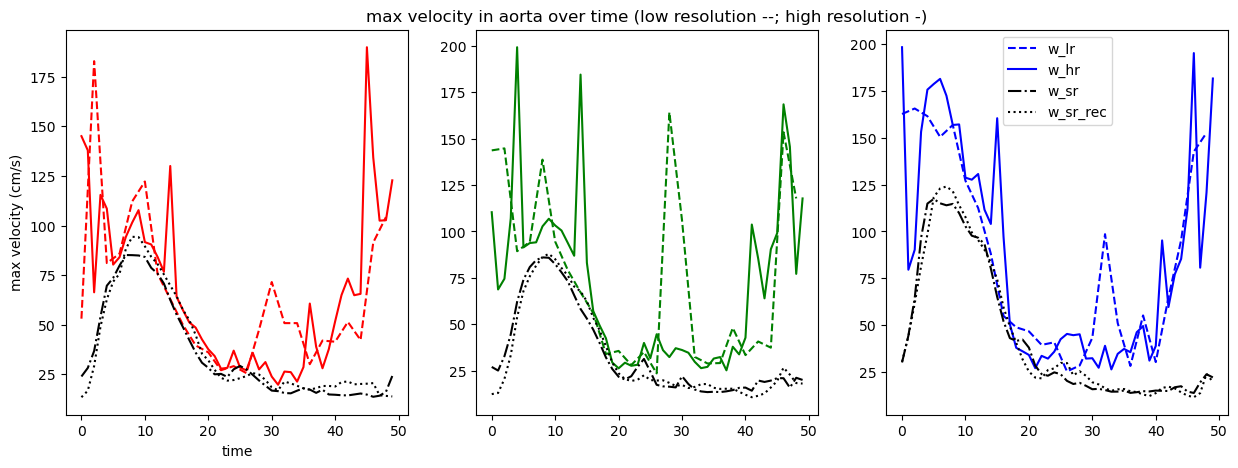

u: [(0, -2.05), (1, -0.89), (2, -2.39), (3, -2.98), (4, -3.22), (5, -3.0), (6, -3.18), (7, -2.89), (8, -2.65), (9, -2.31), (10, -2.36), (11, -2.03), (12, -1.95), (13, -1.52), (14, -1.48), (15, -0.53), (16, 0.12), (17, 0.56), (18, 1.58), (19, 1.44), (20, 1.44), (21, 1.72), (22, 0.93), (23, -0.04), (24, 1.11), (25, 0.5), (26, 0.22), (27, 0.17), (28, -0.42), (29, -0.45), (30, 0.75), (31, -0.33), (32, -1.08), (33, -0.82), (34, -1.11), (35, -0.71), (36, -1.08), (37, -0.61), (38, -0.43), (39, -0.45), (40, -0.31), (41, -0.38), (42, 0.85), (43, -0.53), (44, -1.09), (45, 0.03), (46, -1.49), (47, -0.96), (48, -2.5), (49, -3.24)]
v: [(0, 3.03), (1, 1.64), (2, 3.19), (3, 3.2), (4, 3.25), (5, 3.7), (6, 3.94), (7, 3.82), (8, 3.53), (9, 3.17), (10, 2.76), (11, 1.8), (12, 1.68), (13, 1.09), (14, 1.22), (15, 0.56), (16, -0.35), (17, -0.6), (18, -1.32), (19, -2.32), (20, -4.19), (21, -6.59), (22, -10.48), (23, -12.46), (24, -14.11), (25, -12.12), (26, -9.28), (27, -6.6), (28, -3.95), (29, -2.42), (30, -

In [29]:
# plot max velocity for aorta

u_lr_max_aorta = np.max(np.abs(lr_u),axis=(1,2,3), where=mask_aorta.astype(bool), initial = 0)
v_lr_max_aorta = np.max(np.abs(lr_v),axis=(1,2,3), where=mask_aorta.astype(bool), initial = 0)
w_lr_max_aorta = np.max(np.abs(lr_w),axis=(1,2,3), where=mask_aorta.astype(bool), initial = 0)

u_hr_max_aorta = np.max(np.abs(hr_u), axis=(1,2,3), where=mask_aorta.astype(bool), initial = 0)
v_hr_max_aorta = np.max(np.abs(hr_v), axis=(1,2,3), where=mask_aorta.astype(bool), initial = 0)
w_hr_max_aorta = np.max(np.abs(hr_w), axis=(1,2,3), where=mask_aorta.astype(bool), initial = 0)

u_sr_max_aorta = np.max(np.abs(sr_u), axis=(1,2,3), where=mask_aorta.astype(bool), initial =0)
v_sr_max_aorta = np.max(np.abs(sr_v), axis=(1,2,3), where=mask_aorta.astype(bool), initial =0)
w_sr_max_aorta = np.max(np.abs(sr_w), axis=(1,2,3), where=mask_aorta.astype(bool), initial =0)

u_sr_max_aorta_rec = np.max(np.abs(sr_u_rec), axis=(1,2,3), where=mask_aorta.astype(bool), initial =0)
v_sr_max_aorta_rec = np.max(np.abs(sr_v_rec), axis=(1,2,3), where=mask_aorta.astype(bool), initial =0)
w_sr_max_aorta_rec = np.max(np.abs(sr_w_rec), axis=(1,2,3), where=mask_aorta.astype(bool), initial =0)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(0, T_hr, 2), u_lr_max_aorta, '--', color = 'r')
plt.plot(u_hr_max_aorta, label='u_hr',  color = 'r')
plt.plot(u_sr_max_aorta, label='u_sr',  color = 'black', linestyle='-.')
plt.plot(u_sr_max_aorta_rec, label='u_sr_rec',  color = 'black', linestyle=':')
plt.xlabel('time')
plt.ylabel('max velocity (cm/s)')

plt.subplot(1, 3, 2)
plt.plot(range(0, T_hr, 2), v_lr_max_aorta, '--', color = 'g')
plt.plot(v_hr_max_aorta, label='v_hr',  color = 'g')
plt.plot(v_sr_max_aorta, label='v_sr',  color = 'black', linestyle='-.')
plt.plot(v_sr_max_aorta_rec, label='v_sr_rec',  color = 'black', linestyle=':')
plt.title('max velocity in aorta over time (low resolution --; high resolution -)')

plt.subplot(1, 3, 3)
plt.plot(range(0, T_hr, 2), w_lr_max_aorta, '--', label = 'w_lr', color = 'b')
plt.plot(w_hr_max_aorta, label='w_hr',  color = 'b')
plt.plot(w_sr_max_aorta, label='w_sr',  color = 'black', linestyle='-.')
plt.plot(w_sr_max_aorta_rec, label='w_sr_rec',  color = 'black', linestyle=':')
plt.legend()

plt.show()

vel_u_aorta_time = [(frame, u_hr_max_aorta[frame].round(2)) for frame in range(T_hr)]
vel_v_aorta_time = [(frame, v_hr_max_aorta[frame].round(2)) for frame in range(T_hr)]
vel_w_aorta_time = [(frame, w_hr_max_aorta[frame].round(2)) for frame in range(T_hr)]
print('u:', vel_u_lv_time)
print('v:', vel_v_lv_time)
print('w:', vel_w_lv_time)

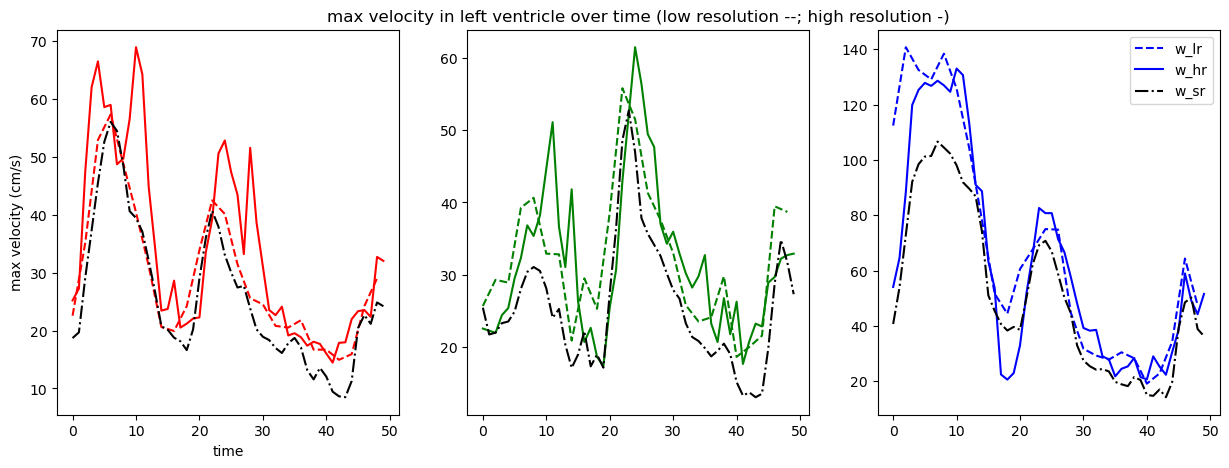

u: [(0, 25.2), (1, 27.25), (2, 47.47), (3, 62.03), (4, 66.52), (5, 58.61), (6, 59.0), (7, 48.74), (8, 49.72), (9, 56.56), (10, 68.96), (11, 64.27), (12, 44.84), (13, 34.38), (14, 23.44), (15, 23.74), (16, 28.62), (17, 20.51), (18, 21.2), (19, 22.08), (20, 22.27), (21, 33.5), (22, 39.17), (23, 50.6), (24, 52.84), (25, 47.37), (26, 43.47), (27, 33.21), (28, 51.58), (29, 38.68), (30, 31.06), (31, 23.54), (32, 22.66), (33, 24.13), (34, 19.15), (35, 19.54), (36, 18.85), (37, 17.39), (38, 18.07), (39, 17.68), (40, 16.02), (41, 14.46), (42, 17.88), (43, 17.97), (44, 21.98), (45, 23.35), (46, 23.54), (47, 22.37), (48, 32.72), (49, 32.04)]
v: [(0, 22.56), (1, 22.27), (2, 21.98), (3, 24.42), (4, 25.4), (5, 29.5), (6, 32.33), (7, 36.83), (8, 35.36), (9, 38.19), (10, 44.64), (11, 51.09), (12, 36.63), (13, 31.06), (14, 41.81), (15, 26.37), (16, 20.71), (17, 22.66), (18, 18.66), (19, 17.39), (20, 25.49), (21, 30.67), (22, 42.98), (23, 52.16), (24, 61.44), (25, 56.36), (26, 49.43), (27, 47.67), (28, 

In [30]:
# plot max velocity for left ventricle

u_lr_max_lv = np.max(np.abs(lr_u),axis=(1,2,3), where=mask_lv.astype(bool), initial = 0)
v_lr_max_lv = np.max(np.abs(lr_v),axis=(1,2,3), where=mask_lv.astype(bool), initial = 0)
w_lr_max_lv = np.max(np.abs(lr_w),axis=(1,2,3), where=mask_lv.astype(bool), initial = 0)

u_hr_max_lv = np.max(np.abs(hr_u), axis=(1,2,3), where=mask_lv.astype(bool), initial = 0)
v_hr_max_lv = np.max(np.abs(hr_v), axis=(1,2,3), where=mask_lv.astype(bool), initial = 0)
w_hr_max_lv = np.max(np.abs(hr_w), axis=(1,2,3), where=mask_lv.astype(bool), initial = 0)

u_sr_max_lv = np.max(np.abs(sr_u), axis=(1,2,3), where=mask_lv.astype(bool), initial =0)
v_sr_max_lv = np.max(np.abs(sr_v), axis=(1,2,3), where=mask_lv.astype(bool), initial =0)
w_sr_max_lv = np.max(np.abs(sr_w), axis=(1,2,3), where=mask_lv.astype(bool), initial =0)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(0, T_hr, 2), u_lr_max_lv, '--', color = 'r')
plt.plot(u_hr_max_lv, label='u_hr',  color = 'r')
plt.plot(u_sr_max_lv, label='u_sr',  color = 'black', linestyle='-.')
plt.xlabel('time')
plt.ylabel('max velocity (cm/s)')

plt.subplot(1, 3, 2)
plt.plot(range(0, T_hr, 2), v_lr_max_lv, '--', color = 'g')
plt.plot(v_hr_max_lv, label='v_hr',  color = 'g')
plt.plot(v_sr_max_lv, label='v_sr',  color = 'black', linestyle='-.')
plt.title('max velocity in left ventricle over time (low resolution --; high resolution -)')

plt.subplot(1, 3, 3)
plt.plot(range(0, T_hr, 2), w_lr_max_lv, '--', label = 'w_lr', color = 'b')
plt.plot(w_hr_max_lv, label='w_hr',  color = 'b')
plt.plot(w_sr_max_lv, label='w_sr',  color = 'black', linestyle='-.')
plt.legend()

plt.show()

vel_u_lv_time = [(frame, u_hr_max_lv[frame].round(2)) for frame in range(T_hr)]
vel_v_lv_time = [(frame, v_hr_max_lv[frame].round(2)) for frame in range(T_hr)]
vel_w_lv_time = [(frame, w_hr_max_lv[frame].round(2)) for frame in range(T_hr)]
print('u:', vel_u_lv_time)
print('v:', vel_v_lv_time)
print('w:', vel_w_lv_time)

### k and $R^2$ values

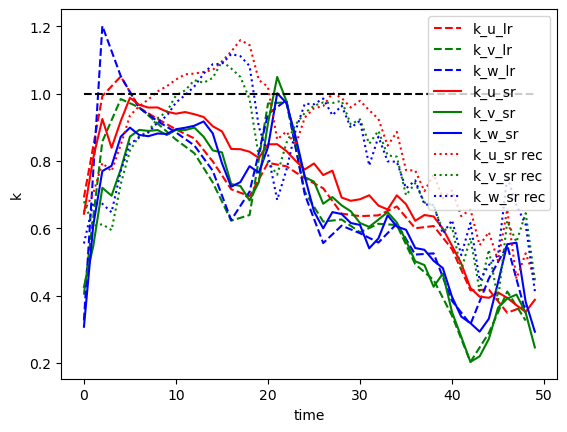

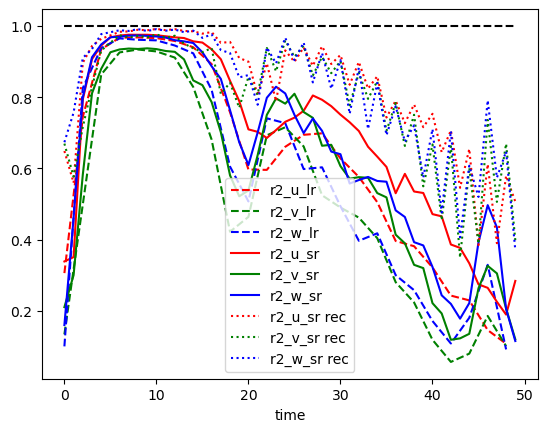

In [31]:
# plot k and r2 values for each direction over time 


k_u_lrhr, r2_u_lrhr = calculate_k_R2_timeseries(lr_u, hr_u[::2], np.repeat(mask[np.newaxis, ...], T_lr, axis=0))
k_v_lrhr, r2_v_lrhr = calculate_k_R2_timeseries(lr_v, hr_v[::2], np.repeat(mask[np.newaxis, ...], T_lr, axis=0))
k_w_lrhr, r2_w_lrhr = calculate_k_R2_timeseries(lr_w, hr_w[::2], np.repeat(mask[np.newaxis, ...], T_lr, axis=0))

k_u_srhr, r2_u_srhr = calculate_k_R2_timeseries(sr_u, hr_u, np.repeat(mask[np.newaxis, ...], T_hr, axis=0))
k_v_srhr, r2_v_srhr = calculate_k_R2_timeseries(sr_v, hr_v, np.repeat(mask[np.newaxis, ...], T_hr, axis=0))
k_w_srhr, r2_w_srhr = calculate_k_R2_timeseries(sr_w, hr_w, np.repeat(mask[np.newaxis, ...], T_hr, axis=0))

k_u_srhr_rec, r2_u_srhr_rec = calculate_k_R2_timeseries(sr_u_rec, hr_u, np.repeat(mask[np.newaxis, ...], T_hr, axis=0))
k_v_srhr_rec, r2_v_srhr_rec = calculate_k_R2_timeseries(sr_v_rec, hr_v, np.repeat(mask[np.newaxis, ...], T_hr, axis=0))
k_w_srhr_rec, r2_w_srhr_rec = calculate_k_R2_timeseries(sr_w_rec, hr_w, np.repeat(mask[np.newaxis, ...], T_hr, axis=0))

plt.figure()
plt.plot(range(0, T_hr, 2), k_u_lrhr,'--', label='k_u_lr', color = 'r')
plt.plot(range(0, T_hr, 2), k_v_lrhr,'--', label='k_v_lr', color = 'g')
plt.plot(range(0, T_hr, 2), k_w_lrhr,'--', label='k_w_lr', color = 'b')
plt.plot(range(0, T_hr), k_u_srhr, label='k_u_sr', color = 'r')
plt.plot(range(0, T_hr), k_v_srhr, label='k_v_sr', color = 'g')
plt.plot(range(0, T_hr), k_w_srhr, label='k_w_sr', color = 'b')
plt.plot(range(0, T_hr), k_u_srhr_rec, label='k_u_sr rec', color = 'r', linestyle=':')
plt.plot(range(0, T_hr), k_v_srhr_rec, label='k_v_sr rec', color = 'g', linestyle=':')
plt.plot(range(0, T_hr), k_w_srhr_rec, label='k_w_sr rec', color = 'b', linestyle=':')
plt.plot(range(0, T_hr), np.ones(T_hr), '--', color='black')
plt.xlabel('time')
plt.ylabel('k')
plt.legend()

plt.figure()
plt.plot(range(0, T_hr, 2), r2_u_lrhr, '--', label='r2_u_lr', color = 'r')
plt.plot(range(0, T_hr, 2), r2_v_lrhr, '--', label='r2_v_lr', color = 'g')
plt.plot(range(0, T_hr, 2), r2_w_lrhr, '--', label='r2_w_lr', color = 'b')
plt.plot(range(0, T_hr), r2_u_srhr, label='r2_u_sr', color = 'r')
plt.plot(range(0, T_hr), r2_v_srhr, label='r2_v_sr', color = 'g')
plt.plot(range(0, T_hr), r2_w_srhr, label='r2_w_sr', color = 'b')
plt.plot(range(0, T_hr), r2_u_srhr_rec, label='r2_u_sr rec', color = 'r', linestyle=':')
plt.plot(range(0, T_hr), r2_v_srhr_rec, label='r2_v_sr rec', color = 'g', linestyle=':')
plt.plot(range(0, T_hr), r2_w_srhr_rec, label='r2_w_sr rec', color = 'b', linestyle=':')
plt.plot(range(0, T_hr), np.ones(T_hr), '--', color='black')
plt.xlabel('time')

plt.legend()

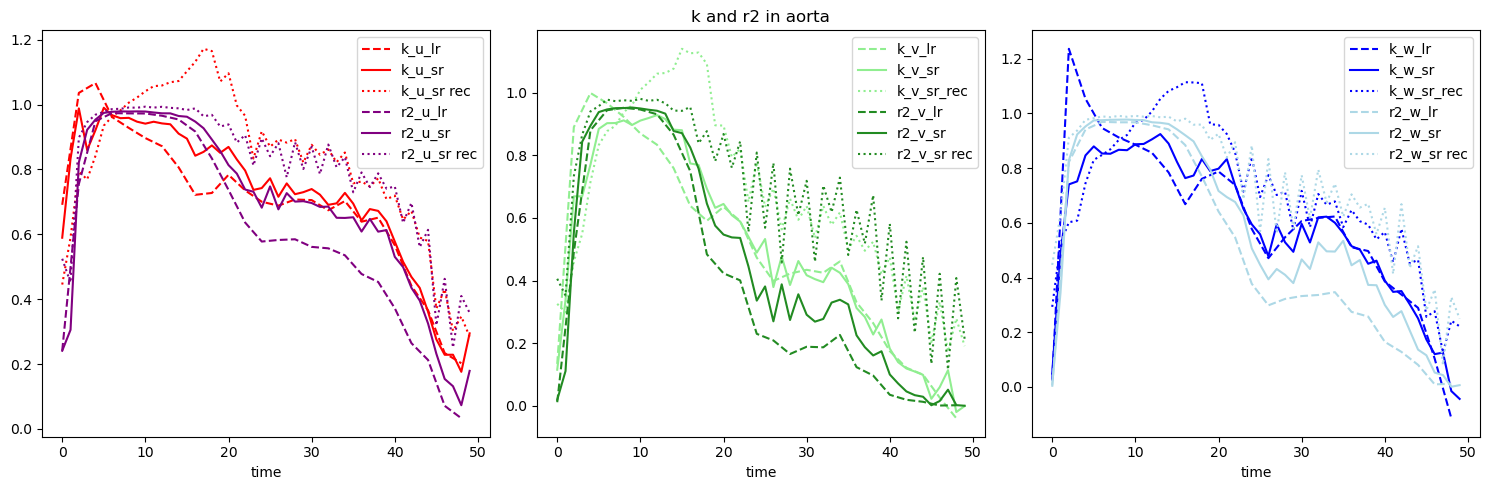

In [32]:

k_u_lrhr_aorta, r2_u_lrhr_aorta = calculate_k_R2_timeseries(lr_u, hr_u[::2], np.repeat(mask_aorta[np.newaxis, ...], T_lr, axis=0))
k_v_lrhr_aorta, r2_v_lrhr_aorta = calculate_k_R2_timeseries(lr_v, hr_v[::2], np.repeat(mask_aorta[np.newaxis, ...], T_lr, axis=0))
k_w_lrhr_aorta, r2_w_lrhr_aorta = calculate_k_R2_timeseries(lr_w, hr_w[::2], np.repeat(mask_aorta[np.newaxis, ...], T_lr, axis=0))

k_u_srhr_aorta, r2_u_srhr_aorta = calculate_k_R2_timeseries(sr_u, hr_u, np.repeat(mask_aorta[np.newaxis, ...], T_hr, axis=0))
k_v_srhr_aorta, r2_v_srhr_aorta = calculate_k_R2_timeseries(sr_v, hr_v, np.repeat(mask_aorta[np.newaxis, ...], T_hr, axis=0))
k_w_srhr_aorta, r2_w_srhr_aorta = calculate_k_R2_timeseries(sr_w, hr_w, np.repeat(mask_aorta[np.newaxis, ...], T_hr, axis=0))

k_u_srhr_aorta_rec, r2_u_srhr_aorta_rec = calculate_k_R2_timeseries(sr_u_rec, hr_u, np.repeat(mask_aorta[np.newaxis, ...], T_hr, axis=0))
k_v_srhr_aorta_rec, r2_v_srhr_aorta_rec = calculate_k_R2_timeseries(sr_v_rec, hr_v, np.repeat(mask_aorta[np.newaxis, ...], T_hr, axis=0))
k_w_srhr_aorta_rec, r2_w_srhr_aorta_rec = calculate_k_R2_timeseries(sr_w_rec, hr_w, np.repeat(mask_aorta[np.newaxis, ...], T_hr, axis=0))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(0, T_hr, 2), k_u_lrhr_aorta,'--', label='k_u_lr', color = 'r')
plt.plot(range(0, T_hr), k_u_srhr_aorta, label='k_u_sr', color = 'r')
plt.plot(range(0, T_hr), k_u_srhr_aorta_rec, label='k_u_sr rec', color = 'r', linestyle=':')
plt.plot(range(0, T_hr, 2), r2_u_lrhr_aorta, '--', label='r2_u_lr', color = 'purple')
plt.plot(range(0, T_hr), r2_u_srhr_aorta, label='r2_u_sr', color = 'purple')
plt.plot(range(0, T_hr), r2_u_srhr_aorta_rec, label='r2_u_sr rec', color = 'purple', linestyle=':')
plt.xlabel('time')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(0, T_hr, 2), k_v_lrhr_aorta,'--', label='k_v_lr', color = 'lightgreen')
plt.plot(range(0, T_hr), k_v_srhr_aorta, label='k_v_sr', color = 'lightgreen')
plt.plot(range(0, T_hr), k_v_srhr_aorta_rec, label='k_v_sr_rec', color = 'lightgreen', linestyle=':')
plt.plot(range(0, T_hr, 2), r2_v_lrhr_aorta, '--', label='r2_v_lr', color = 'forestgreen')
plt.plot(range(0, T_hr), r2_v_srhr_aorta, label='r2_v_sr', color = 'forestgreen')
plt.plot(range(0, T_hr), r2_v_srhr_aorta_rec, label='r2_v_sr rec', color = 'forestgreen', linestyle=':')
plt.xlabel('time')
plt.legend()
plt.title('k and r2 in aorta')

plt.subplot(1, 3, 3)
plt.plot(range(0, T_hr, 2), k_w_lrhr_aorta,'--', label='k_w_lr', color = 'b')
plt.plot(range(0, T_hr), k_w_srhr_aorta, label='k_w_sr', color = 'b')
plt.plot(range(0, T_hr), k_w_srhr_aorta_rec, label='k_w_sr_rec', color = 'b', linestyle=':')
plt.plot(range(0, T_hr, 2), r2_w_lrhr_aorta, '--', label='r2_w_lr', color = 'lightblue')
plt.plot(range(0, T_hr), r2_w_srhr_aorta, label='r2_w_sr', color = 'lightblue')
plt.plot(range(0, T_hr), r2_w_srhr_aorta_rec, label='r2_w_sr rec', color = 'lightblue', linestyle=':')
plt.xlabel('time')
# plt.ylabel('k aorta')
plt.legend()
plt.tight_layout()


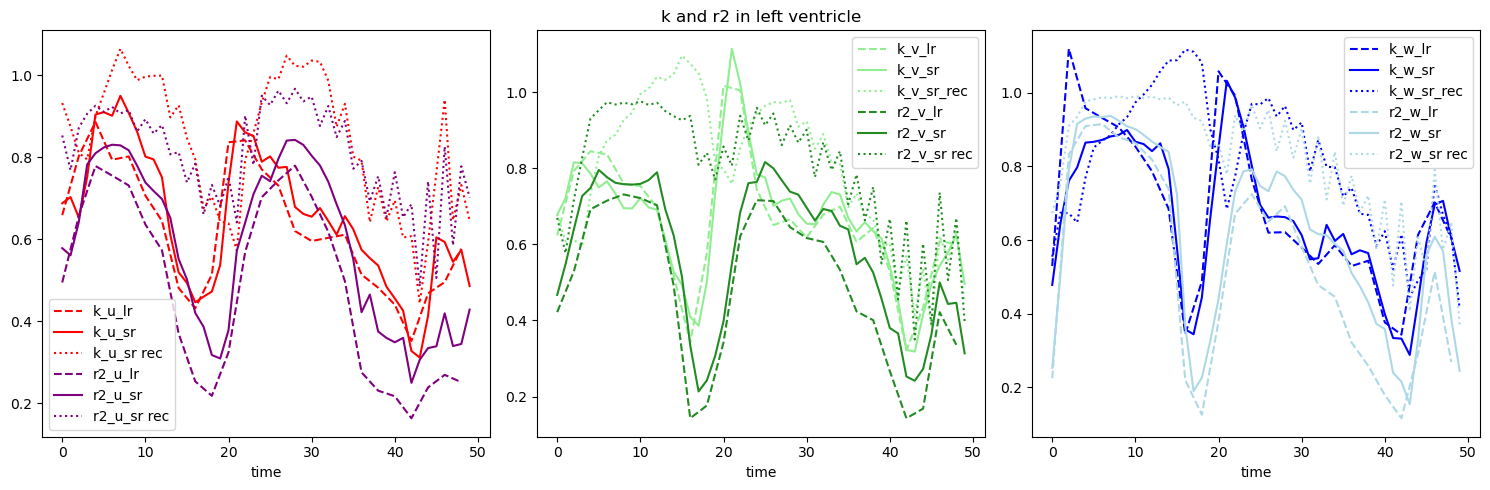

In [33]:


# plot k and r2 values for each direction over time 

k_u_lrhr_lv, r2_u_lrhr_lv = calculate_k_R2_timeseries(lr_u, hr_u[::2], np.repeat(mask_lv[np.newaxis, ...], T_lr, axis=0))
k_v_lrhr_lv, r2_v_lrhr_lv = calculate_k_R2_timeseries(lr_v, hr_v[::2], np.repeat(mask_lv[np.newaxis, ...], T_lr, axis=0))
k_w_lrhr_lv, r2_w_lrhr_lv = calculate_k_R2_timeseries(lr_w, hr_w[::2], np.repeat(mask_lv[np.newaxis, ...], T_lr, axis=0))

k_u_srhr_lv, r2_u_srhr_lv = calculate_k_R2_timeseries(sr_u, hr_u, np.repeat(mask_lv[np.newaxis, ...], T_hr, axis=0))
k_v_srhr_lv, r2_v_srhr_lv = calculate_k_R2_timeseries(sr_v, hr_v, np.repeat(mask_lv[np.newaxis, ...], T_hr, axis=0))
k_w_srhr_lv, r2_w_srhr_lv = calculate_k_R2_timeseries(sr_w, hr_w, np.repeat(mask_lv[np.newaxis, ...], T_hr, axis=0))

k_u_srhr_rec, r2_u_srhr_rec = calculate_k_R2_timeseries(sr_u_rec, hr_u, np.repeat(mask_lv[np.newaxis, ...], T_hr, axis=0))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(0, T_hr, 2), k_u_lrhr_lv,'--', label='k_u_lr', color = 'r')
plt.plot(range(0, T_hr), k_u_srhr_lv, label='k_u_sr', color = 'r')
plt.plot(range(0, T_hr), k_u_srhr_rec, label='k_u_sr rec', color = 'r', linestyle=':')
plt.plot(range(0, T_hr, 2), r2_u_lrhr_lv, '--', label='r2_u_lr', color = 'purple')
plt.plot(range(0, T_hr), r2_u_srhr_lv, label='r2_u_sr', color = 'purple')
plt.plot(range(0, T_hr), r2_u_srhr_rec, label='r2_u_sr rec', color = 'purple', linestyle=':')
plt.xlabel('time')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(0, T_hr, 2), k_v_lrhr_lv,'--', label='k_v_lr', color = 'lightgreen')
plt.plot(range(0, T_hr), k_v_srhr_lv, label='k_v_sr', color = 'lightgreen')
plt.plot(range(0, T_hr), k_v_srhr_rec, label='k_v_sr_rec', color = 'lightgreen', linestyle=':')
plt.plot(range(0, T_hr, 2), r2_v_lrhr_lv, '--', label='r2_v_lr', color = 'forestgreen')
plt.plot(range(0, T_hr), r2_v_srhr_lv, label='r2_v_sr', color = 'forestgreen')
plt.plot(range(0, T_hr), r2_v_srhr_rec, label='r2_v_sr rec', color = 'forestgreen', linestyle=':')
plt.xlabel('time')
plt.legend()
plt.title('k and r2 in left ventricle')

plt.subplot(1, 3, 3)
plt.plot(range(0, T_hr, 2), k_w_lrhr_lv,'--', label='k_w_lr', color = 'b')
plt.plot(range(0, T_hr), k_w_srhr_lv, label='k_w_sr', color = 'b')
plt.plot(range(0, T_hr), k_w_srhr_rec, label='k_w_sr_rec', color = 'b', linestyle=':')
plt.plot(range(0, T_hr, 2), r2_w_lrhr_lv, '--', label='r2_w_lr', color = 'lightblue')
plt.plot(range(0, T_hr), r2_w_srhr_lv, label='r2_w_sr', color = 'lightblue')
plt.plot(range(0, T_hr), r2_w_srhr_rec, label='r2_w_sr rec', color = 'lightblue', linestyle=':')
plt.xlabel('time')
# plt.ylabel('k left ventricle')
plt.legend()
plt.tight_layout()